In [23]:
%%capture
!pip install folium matplotlib mapclassify

In [24]:
import pandas as pd
import geopandas as gpd
import os
import zipfile

FOLDER_PATH = '/content/drive/MyDrive/DSL SMART CITIES'

from google.colab import drive
drive.mount('/content/drive')

COLS_TO_KEEP = ['fclass','geometry']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import NILs data

In [25]:
nil = gpd.read_file(os.path.join(FOLDER_PATH, 'Processed','nil.geojson'))
nil = nil.to_crs(epsg=4326)
nil

,ID_NIL,NIL,area_sqkm,Residenti,geometry
0,1,duomo,2.341616,16608,"POLYGON ((9.19482 45.47201, 9.19473 45.47192, ..."
1,2,brera,1.637333,18294,"POLYGON ((9.19165 45.46906, 9.19204 45.46937, ..."
2,3,giardini p.ta venezia,0.249637,43,"POLYGON ((9.2009 45.47654, 9.2 45.47696, 9.199..."
3,4,guastalla,1.547962,15528,"POLYGON ((9.207 45.46787, 9.20693 45.46853, 9...."
4,5,porta vigentina - porta lodovica,1.135196,13548,"POLYGON ((9.20186 45.45238, 9.20078 45.45301, ..."
...,...,...,...,...,...
83,84,parco nord,1.532331,98,"POLYGON ((9.2004 45.52848, 9.20028 45.52846, 9..."
84,85,parco delle abbazie,13.733841,364,"POLYGON ((9.21711 45.43187, 9.21531 45.43232, ..."
85,86,parco dei navigli,3.623149,354,"POLYGON ((9.13886 45.42855, 9.13769 45.42947, ..."
86,87,assiano,5.840942,211,"POLYGON ((9.04687 45.46276, 9.04685 45.46278, ..."


# Import OSM_Roads

In [26]:
osm = gpd.read_file(os.path.join(FOLDER_PATH, 'Processed', 'OSM','gis_osm_roads_free_1.shp'))
osm = osm.drop_duplicates(['osm_id'])
osm = osm[COLS_TO_KEEP]
osm

,fclass,geometry
0,track_grade2,"LINESTRING (9.06474 45.51102, 9.06449 45.51097..."
1,unclassified,"LINESTRING (9.14511 45.51564, 9.14535 45.51584)"
2,service,"LINESTRING (9.1425 45.51604, 9.14254 45.51591,..."
3,residential,"LINESTRING (9.14338 45.51581, 9.1433 45.5161, ..."
4,residential,"LINESTRING (9.14329 45.51616, 9.14312 45.51614..."
...,...,...
93342,service,"LINESTRING (9.22953 45.52176, 9.22928 45.52268..."
93343,service,"LINESTRING (9.22865 45.52274, 9.22924 45.52282)"
93344,service,"LINESTRING (9.23018 45.52312, 9.23078 45.52318..."
93345,footway,"LINESTRING (9.23078 45.52318, 9.23077 45.52317..."


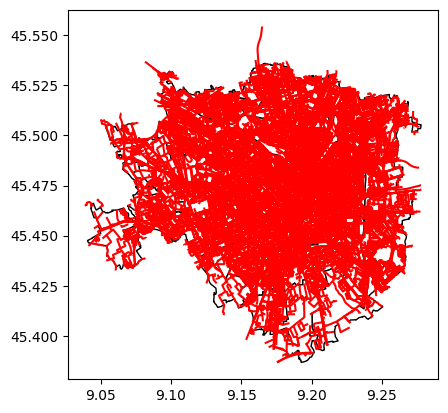

In [27]:
# prompt: plot nil with osm on top

base = nil.plot(color='white', edgecolor='black')
osm.plot(ax=base, marker='o', color='red', markersize=5);

# Bike Lanes

In [28]:
bike_lanes = osm[osm['fclass']=='cycleway']
bike_lanes.explore()

In [29]:
bike_lanes

,fclass,geometry
72,cycleway,"LINESTRING (9.14296 45.51774, 9.14453 45.51798..."
80,cycleway,"LINESTRING (9.14614 45.51897, 9.1461 45.51895,..."
96,cycleway,"LINESTRING (9.13918 45.51596, 9.13891 45.51684..."
123,cycleway,"LINESTRING (9.13841 45.51703, 9.13842 45.51697..."
129,cycleway,"LINESTRING (9.13885 45.51701, 9.13885 45.51704..."
...,...,...
93259,cycleway,"LINESTRING (9.25649 45.5166, 9.25649 45.5168, ..."
93265,cycleway,"LINESTRING (9.25803 45.51839, 9.25823 45.51851..."
93266,cycleway,"LINESTRING (9.25969 45.51881, 9.26012 45.51871..."
93268,cycleway,"LINESTRING (9.25879 45.51877, 9.2589 45.51881,..."


 ## Calculate length

In [30]:
bike_lanes = bike_lanes.to_crs(epsg=32632)
bike_lanes['bike_lane_km'] = bike_lanes.length / 1000
bike_lanes = bike_lanes.to_crs(epsg=4326)
bike_lanes

,fclass,geometry,bike_lane_km
72,cycleway,"LINESTRING (9.14296 45.51773, 9.14453 45.51798...",0.365252
80,cycleway,"LINESTRING (9.14614 45.51897, 9.1461 45.51895,...",0.172289
96,cycleway,"LINESTRING (9.13918 45.51596, 9.13891 45.51684...",0.121794
123,cycleway,"LINESTRING (9.13841 45.51703, 9.13842 45.51697...",0.009405
129,cycleway,"LINESTRING (9.13885 45.51701, 9.13885 45.51704...",0.006964
...,...,...,...
93259,cycleway,"LINESTRING (9.25649 45.5166, 9.25649 45.5168, ...",0.252179
93265,cycleway,"LINESTRING (9.25803 45.51839, 9.25823 45.51851...",0.072768
93266,cycleway,"LINESTRING (9.25969 45.51881, 9.26012 45.51871...",0.110200
93268,cycleway,"LINESTRING (9.25879 45.51877, 9.2589 45.51881,...",0.072255


In [31]:
bike_lanes = nil.sjoin(bike_lanes, how='left').drop(['index_right','fclass'], axis=1)
bike_lanes_grouped = bike_lanes.groupby(['ID_NIL','NIL','area_sqkm','Residenti'])['bike_lane_km'].sum().reset_index()

In [32]:
bike_lanes_grouped.sort_values(by=['bike_lane_km'], ascending = False)

,ID_NIL,NIL,area_sqkm,Residenti,bike_lane_km
82,84,parco nord,1.532331,98,17.166456
36,42,stadera - chiesa rossa - q.re torretta - conca...,3.232115,29415,9.162990
83,85,parco delle abbazie,13.733841,364,8.967624
5,14,niguarda - ca' granda - prato centenaro - q.re...,4.246805,36161,8.663215
9,18,cimiano - rottole - q.re feltre,4.971419,19565,8.614119
...,...,...,...,...,...
44,5,porta vigentina - porta lodovica,1.135196,13548,0.264969
52,57,san siro,0.984888,26653,0.261145
49,54,muggiano,0.444202,3088,0.052065
75,78,farini,1.010193,3790,0.047243


In [33]:
#bike_lanes_grouped.to_csv(os.path.join(FOLDER_PATH, 'Processed', 'bike_lanes.csv'), index=False)

# Roads

In [34]:
roads = ['motorway',
         'trunk',
         'primary',
         'secondary',
         'tertiary',
         'unclassified',
         'residential']

osm_roads = osm[osm['fclass'].isin(roads)]
m = nil.explore(color = 'black')
osm_roads.explore(m=m)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
osm_roads = osm_roads.to_crs(epsg=32632)
osm_roads['roads_km'] = osm_roads.length / 1000
osm_roads = osm_roads.to_crs(epsg=4326)
osm_roads

,fclass,geometry,roads_km
1,unclassified,"LINESTRING (9.14511 45.51564, 9.14535 45.51584)",0.028906
3,residential,"LINESTRING (9.14338 45.51581, 9.1433 45.5161, ...",0.039785
4,residential,"LINESTRING (9.14329 45.51616, 9.14312 45.51614...",0.112582
9,residential,"LINESTRING (9.14329 45.51616, 9.14327 45.51622...",0.043618
10,residential,"LINESTRING (9.14176 45.51632, 9.14297 45.51651...",0.113180
...,...,...,...
93324,residential,"LINESTRING (9.22935 45.52098, 9.22937 45.52104...",0.065859
93326,unclassified,"LINESTRING (9.23016 45.52163, 9.23014 45.5216,...",0.079301
93329,residential,"LINESTRING (9.22955 45.52155, 9.22957 45.52156...",0.049278
93332,unclassified,"LINESTRING (9.23088 45.52171, 9.23028 45.52164...",0.056536


## Sjoin & Groupby

In [36]:
roads = nil.sjoin(osm_roads, how='left').drop(['index_right','fclass'], axis=1)
roads_grouped = roads.groupby(['ID_NIL','NIL','area_sqkm','Residenti'])['roads_km'].sum().reset_index()
roads_grouped.sort_values(by=['roads_km'], ascending = False)

,ID_NIL,NIL,area_sqkm,Residenti,roads_km
13,21,buenos aires - porta venezia - porta monforte,2.877434,62371,64.383128
68,71,villapizzone - cagnola - boldinasco,3.426941,41519,58.396005
50,55,baggio - q.re degli olmi - q.re valsesia,3.471750,30434,48.239794
47,52,bande nere,2.663780,44048,46.432611
5,14,niguarda - ca' granda - prato centenaro - q.re...,4.246805,36161,46.044344
...,...,...,...,...,...
32,39,quintosole,1.058525,919,3.434229
77,8,parco sempione,0.470420,0,3.113705
22,3,giardini p.ta venezia,0.249637,43,3.024067
27,34,chiaravalle,0.309494,1016,2.562731


In [37]:
#lanes = roads_grouped.merge(bike_lanes_grouped, on=['ID_NIL','NIL','area_sqkm','Residenti'], how='left')

## Walkways


In [38]:
walkways = ['living_street', 'pedestrian']

osm_walkways = osm[osm['fclass'].isin(walkways)]
m=nil.explore(color = 'black')
osm_walkways.explore(m=m)

In [39]:
osm_walkways = osm_walkways.to_crs(epsg=32632)
osm_walkways['walkways_km'] = osm_walkways.length / 1000
osm_walkways = osm_walkways.to_crs(epsg=4326)
osm_walkways

,fclass,geometry,walkways_km
34,pedestrian,"LINESTRING (9.14615 45.51675, 9.14633 45.51638...",0.130727
294,pedestrian,"LINESTRING (9.14058 45.51873, 9.14076 45.51815...",0.228635
414,pedestrian,"LINESTRING (9.13203 45.51865, 9.13209 45.51868...",0.032530
500,pedestrian,"LINESTRING (9.14588 45.51919, 9.14576 45.51914...",0.176539
617,pedestrian,"LINESTRING (9.141 45.51987, 9.14102 45.51977, ...",0.126690
...,...,...,...
93149,pedestrian,"LINESTRING (9.24107 45.51699, 9.24108 45.517, ...",0.148339
93163,pedestrian,"LINESTRING (9.23941 45.51799, 9.23942 45.5179,...",0.130649
93227,pedestrian,"LINESTRING (9.24802 45.51918, 9.24805 45.51923...",0.100979
93248,pedestrian,"LINESTRING (9.25321 45.51805, 9.25325 45.51791...",0.119195


In [40]:
walkways = nil.sjoin(osm_walkways, how='left').drop(['index_right','fclass'], axis=1)
walkways_grouped = walkways.groupby(['ID_NIL','NIL','area_sqkm','Residenti'])['walkways_km'].sum().reset_index()
walkways_grouped.sort_values(by=['walkways_km'], ascending = False)

,ID_NIL,NIL,area_sqkm,Residenti,walkways_km
0,1,duomo,2.341616,16608,16.259897
77,8,parco sempione,0.470420,0,11.803825
9,18,cimiano - rottole - q.re feltre,4.971419,19565,8.492643
11,2,brera,1.637333,18294,7.995214
6,15,bicocca,1.529498,8743,5.683660
...,...,...,...,...,...
32,39,quintosole,1.058525,919,0.000000
84,86,parco dei navigli,3.623149,354,0.000000
85,87,assiano,5.840942,211,0.000000
86,88,parco bosco in citta',7.834006,690,0.000000


In [41]:
lanes = roads_grouped.merge(walkways_grouped, on=['ID_NIL','NIL','area_sqkm','Residenti'], how='left')

In [44]:
#lanes.to_csv(os.path.join(FOLDER_PATH, 'Processed', 'lanes.csv'), index=False)